In [1]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

class Autoencoder(object):
    
    def __init__(self, input_dim, encoded_dim):    
        input_layer = Input(shape=(input_dim,))
        hidden_input = Input(shape=(encoded_dim,))
        hidden_layer = Dense(encoded_dim, padding='same', activation='relu')(input_layer)
        output_layer = Dense(input_dim, padding='same' activation='sigmoid')(hidden_layer)
        
        self._autoencoder_model = Model(input_layer, output_layer)
        self._encoder_model = Model(input_layer, hidden_layer)
        tmp_decoder_layer = self._autoencoder_model.layers[-1]
        self._decoder_model = Model(hidden_input, tmp_decoder_layer(hidden_input))
        
        self._autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
        
    def train(self, input_train, input_test, batch_size, epochs):    
        self._autoencoder_model.fit(input_train, 
                                    input_train,
                                    epochs = epochs,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    validation_data=(
                                            input_test, 
                                            input_test))
        
    def getEncodedImage(self, image):
        encoded_image = self._encoder_model.predict(image)
        return encoded_image
    
    def getDecodedImage(self, encoded_imgs):
        decoded_image = self._decoder_model.predict(encoded_imgs)
        return decoded_image

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from math import *
import copy
import os

In [0]:
DATADIR = './data'
# path = os.path.join(DATADIR, category)

#CATEGORIES = ['image']

Train on 256 samples, validate on 256 samples
Epoch 1/50
256/256 [==============================] - 0s 393us/sample - loss: 0.6952 - acc: 0.0444 - val_loss: 0.6931 - val_acc: 0.0460
Epoch 2/50
256/256 [==============================] - 0s 81us/sample - loss: 0.6931 - acc: 0.0460 - val_loss: 0.6922 - val_acc: 0.0474
Epoch 3/50
256/256 [==============================] - 0s 65us/sample - loss: 0.6922 - acc: 0.0474 - val_loss: 0.6916 - val_acc: 0.0491
Epoch 4/50
256/256 [==============================] - 0s 61us/sample - loss: 0.6916 - acc: 0.0491 - val_loss: 0.6910 - val_acc: 0.0503
Epoch 5/50
256/256 [==============================] - 0s 57us/sample - loss: 0.6910 - acc: 0.0503 - val_loss: 0.6902 - val_acc: 0.0515
Epoch 6/50
256/256 [==============================] - 0s 59us/sample - loss: 0.6902 - acc: 0.0515 - val_loss: 0.6894 - val_acc: 0.0526
Epoch 7/50
256/256 [==============================] - 0s 73us/sample - loss: 0.6894 - acc: 0.0526 - val_loss: 0.6884 - val_acc: 0.0536
Epoch 8/

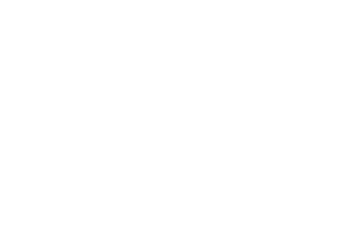

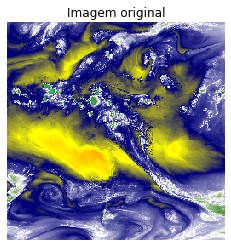

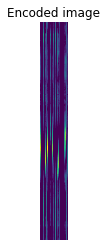

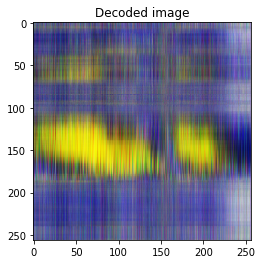

In [6]:
# for category in CATEGORIES:
#     path = os.path.join(DATADIR, category)
for img in os.listdir(DATADIR):
    try:      
#         my_image_original = mpimg.imread(os.path.join(path, img))
        my_image_original = mpimg.imread((os.path.join(DATADIR, img)))
        max_original_value = float(my_image_original.max())
        x_original = my_image_original.astype('float32') / max_original_value
        x_original = x_original.reshape((len(x_original), np.prod(x_original.shape[1:])))    
        
    #             my_image_test = mpimg.imread(os.path.join(path, img))
    #             max_train_test = float(my_image_train.max())
    #             x_test = my_image_test.astype('float32') / max_train_test
    #             x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

        to_reshape = my_image_original.shape

        autoencoder = Autoencoder(x_original.shape[1], 32)   
        autoencoder.train(x_original, x_original, 256, 50)
        encoded_imgs = autoencoder.getEncodedImage(x_original)
        decoded_imgs = autoencoder.getDecodedImage(encoded_imgs)

        decoded_imgs_result = decoded_imgs.reshape(to_reshape[0], to_reshape[1], to_reshape[2])      
        x_original_result = x_original.reshape(to_reshape[0], to_reshape[1], to_reshape[2])
        
        plt.axis("off")
        plt.figure()
        plt.imshow(my_image_original)
        plt.title('Imagem original')
        mpimg.imsave('./result/' + img + '_original.png', my_image_original)
        #plt.savefig('./result/' + img + '_original_imgs.png')

        plt.axis("off")
        plt.figure()
        plt.imshow(encoded_imgs) 
        plt.title('Encoded image')
        mpimg.imsave('./result/' + img + '_encoded_imgs.png', encoded_imgs)
        #plt.savefig('./result/' + img + '_encoded_imgs.png')

        plt.axis("off")
        plt.figure()
        plt.imshow(decoded_imgs_result) 
        plt.title('Decoded image')
        mpimg.imsave('./result/' + img + '_decoded_imgs.png', decoded_imgs_result)
        #plt.savefig('./result/' + img + '_decoded_imgs.png')

    except Exception as e:
        print(e)
        pass

NameError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')